<a href="https://colab.research.google.com/github/sannithnalluri/NLP-Disater-Tweet/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [10]:
train_df=pd.read_csv("train.csv")

In [11]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [12]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stemmer = PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords_set]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

def preprocess_text2(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens

from bs4 import BeautifulSoup
def clean_text(text):
    # Menghapus tag HTML
    text = BeautifulSoup(text, "html.parser").get_text()
    # Menghapus URL
    text = re.sub(r'http\S+', '', text)
    # Menghapus karakter non-ASCII kecuali titik
    text = re.sub(r'[^\x00-\x7F.]', ' ', text)
    # Menghapus karakter khusus kecuali titik
    text = re.sub(f'[{re.escape(string.punctuation.replace(".", ""))}]', '', text)
    # Menghapus angka yang terpisah
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'\.{2,}', '', text)
    # Menghapus spasi ganda setelah titik
    text = re.sub(r'(?<=\.)\s+', ' ', text).strip()
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
clean_data=lambda text:clean_text(text)
train_df["clean_text"]=train_df["text"].apply(clean_data)

<ipython-input-12-2c451a8c7207>:26: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [14]:
train_df

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary TheTawniest The out of control wild...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1. UTC5km S of Volcano Hawaii.
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an ebike collided w...


In [15]:
train_df.at[21,"text"]

'London is cool ;)'

In [16]:
train_df.at[21,"clean_text"]

'London is cool'

In [17]:
preprocess_data=lambda text:preprocess_text(text)
train_df["text_prepro"]=train_df["clean_text"].apply(preprocess_data)

In [18]:
train_df

,id,keyword,location,text,target,clean_text,text_prepro
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,deed reason earthquak may allah forgiv us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,forest fire near la rong sask . canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,resid ask shelter place notifi offic . evacu s...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,peopl receiv wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,got sent photo rubi alaska smoke wildfir pour ...
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...,two giant crane hold bridg collaps nearbi home
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary TheTawniest The out of control wild...,ariaahrari thetawniest control wild fire calif...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1. UTC5km S of Volcano Hawaii.,m1 . utc5km volcano hawaii .
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an ebike collided w...,polic investig ebik collid car littl portug . ...


In [19]:
X=train_df.drop(["id","keyword","location","text","target"],axis=1)
y=train_df["target"]

In [20]:
tokenized_documents=[preprocess_text2(doc) for doc in X["text_prepro"]]

In [21]:
len(tokenized_documents)

7613

In [22]:
tokenized_documents[0]

['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'us']

In [23]:
from gensim.models import Word2Vec
ukuran_vektor=100
word2vec_model = Word2Vec(sentences=tokenized_documents,
                          min_count=1, vector_size=ukuran_vektor,sg=1)

In [24]:
print(word2vec_model)

Word2Vec<vocab=14127, vector_size=100, alpha=0.025>


In [25]:
all_words =word2vec_model.wv.index_to_key
print("50 kata pertama dalam model Word2Vec:")
for index, word in enumerate(all_words):
    if index < 50:
        print(f"{word} : {index}")
    else:
        break

50 kata pertama dalam model Word2Vec:
. : 0
like : 1
fire : 2
get : 3
im : 4
bomb : 5
new : 6
via : 7
one : 8
peopl : 9
go : 10
news : 11
dont : 12
kill : 13
burn : 14
video : 15
flood : 16
crash : 17
time : 18
emerg : 19
disast : 20
attack : 21
build : 22
bodi : 23
year : 24
look : 25
say : 26
polic : 27
home : 28
fatal : 29
day : 30
love : 31
famili : 32
would : 33
make : 34
evacu : 35
still : 36
train : 37
see : 38
come : 39
storm : 40
got : 41
us : 42
know : 43
back : 44
california : 45
watch : 46
want : 47
bag : 48
suicid : 49


In [26]:
sequences = [[word2vec_model.wv.key_to_index[word] for word in text]
             for text in [preprocess_text2(doc) for doc in train_df['text_prepro']]]

In [27]:
max_length = max([len(seq) for seq in sequences])

In [28]:
from keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [29]:
y=np.asarray(y)

In [30]:
y.shape

(7613,)

In [31]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(padded_sequences,y,
                    test_size=0.3,random_state=42, stratify=y)

In [33]:
embedding_matrix = np.zeros((len(word2vec_model.wv.key_to_index) + 1, word2vec_model.vector_size))
for word, i in word2vec_model.wv.key_to_index.items():
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [34]:
jumlah_kelas=len(np.unique(y))

In [35]:
jumlah_kelas

2

In [36]:
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout, Input, Embedding, Bidirectional,GlobalMaxPooling1D
from keras.initializers import GlorotUniform
model = Sequential()
model.add(Input(shape=(max_length,)))
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                    trainable=False))
model.add(Bidirectional(GRU(ukuran_vektor,kernel_initializer=GlorotUniform(), return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(jumlah_kelas*2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(jumlah_kelas, activation='softmax'))

In [37]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                                                      metrics=['accuracy'])

In [38]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5,
                                     restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                    patience=5, min_lr=0.0001)

In [39]:
history = model.fit(X_train, y_train, epochs=500, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])

Epoch 1/500
21/21 [==============================] - 13s 357ms/step - loss: 0.6840 - accuracy: 0.5684 - val_loss: 0.6781 - val_accuracy: 0.5705 - lr: 0.0010
Epoch 2/500
21/21 [==============================] - 5s 224ms/step - loss: 0.6740 - accuracy: 0.5703 - val_loss: 0.6660 - val_accuracy: 0.5705 - lr: 0.0010
Epoch 3/500
21/21 [==============================] - 5s 220ms/step - loss: 0.6605 - accuracy: 0.5703 - val_loss: 0.6536 - val_accuracy: 0.5705 - lr: 0.0010
Epoch 4/500
21/21 [==============================] - 8s 405ms/step - loss: 0.6471 - accuracy: 0.5703 - val_loss: 0.6403 - val_accuracy: 0.5705 - lr: 0.0010
Epoch 5/500
21/21 [==============================] - 7s 341ms/step - loss: 0.6330 - accuracy: 0.6238 - val_loss: 0.6314 - val_accuracy: 0.6607 - lr: 0.0010
Epoch 6/500
21/21 [==============================] - 6s 303ms/step - loss: 0.6168 - accuracy: 0.6996 - val_loss: 0.6223 - val_accuracy: 0.6773 - lr: 0.0010
Epoch 7/500
21/21 [==============================] - 5s 249ms/s

In [40]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'loss: {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

loss: 0.51
Accuracy: 75.26%


In [41]:
print("Konfigurasi Lapisan Embedding:")
print(model.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding', 'trainable': False, 'dtype': 'float32', 'batch_input_shape': (None, None), 'input_dim': 14128, 'output_dim': 100, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': None}


In [42]:
print("Bobot Lapisan Embedding:")
print(model.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[ 0.0439225  -0.02831218 -0.02574219 ...  0.03040952  0.03676963
   0.01100241]
 [-0.0206452  -0.01393359  0.01884833 ... -0.02179232  0.02133146
   0.006241  ]
 [ 0.04859498  0.03875028 -0.00967467 ...  0.01972753  0.03257332
  -0.0311239 ]
 ...
 [-0.01407263 -0.0327616  -0.01326074 ...  0.03368742 -0.02565553
   0.02682037]
 [-0.00521685 -0.03611405  0.03615495 ... -0.00939299 -0.02577504
  -0.02595948]
 [-0.02494993 -0.03135045 -0.02401221 ...  0.00200041  0.03389254
   0.04940716]]


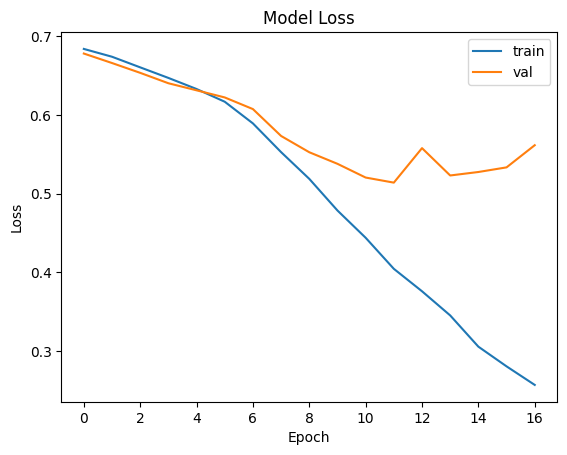

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

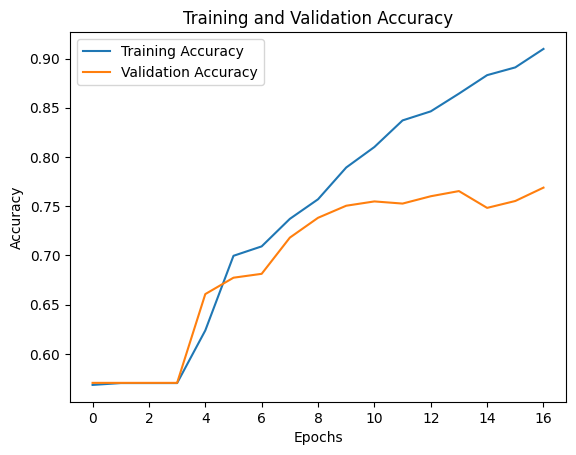

In [44]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 27, 100)           1412800   
                                                                 
 bidirectional (Bidirection  (None, 27, 200)           121200    
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 200)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 256)               51456     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1

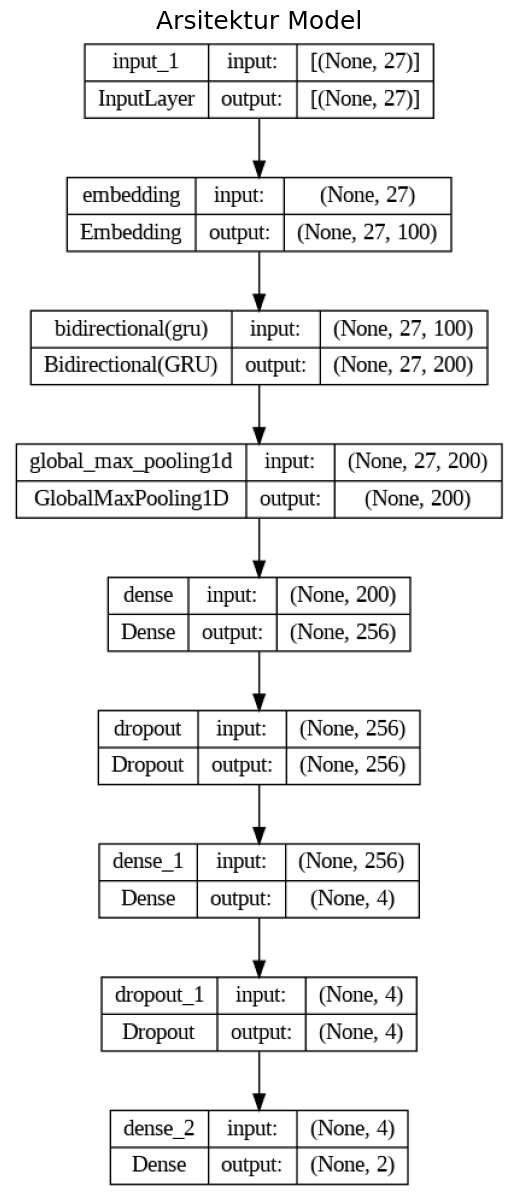

In [46]:
from keras.utils import plot_model
file_name = 'arsitektur_model.png'
plot_model(model, to_file=file_name, show_shapes=True, show_layer_names=True)
plt.figure(figsize=(15,15))
img = plt.imread(file_name)
plt.imshow(img)
plt.title('Arsitektur Model', fontsize=18)
plt.axis('off')
plt.savefig(file_name)
plt.show()

In [47]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_val, y_pred_classes)
print("Classification Report:")
print(report)

72/72 [==============================] - 3s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1303
           1       0.73      0.67      0.70       981

    accuracy                           0.75      2284
   macro avg       0.75      0.74      0.74      2284
weighted avg       0.75      0.75      0.75      2284



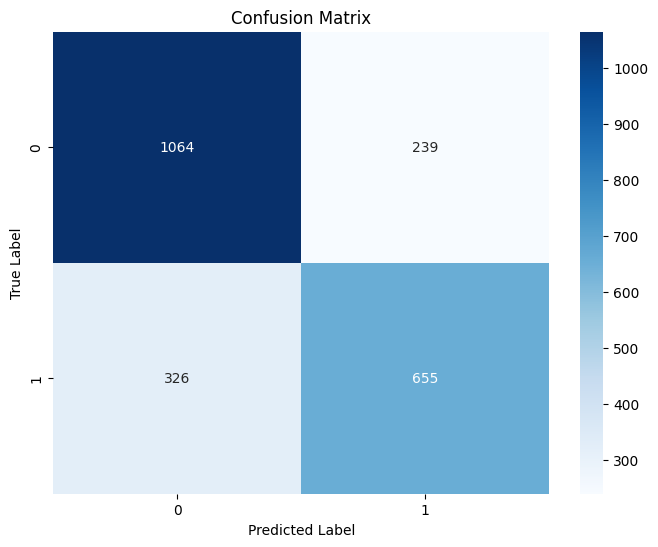

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [49]:
word2vec_model.save("word2vec_model.model")
train_df.to_csv("train_data.csv", index=False)